#Pre procesamiento de datos

Importación de librerías

In [398]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot

Función para procesar una imagen y convertirla a un array 1D en escala de grises

Este código realiza las siguientes acciones sobre un conjunto de datos de imágenes procesadas de lenguaje de señas americano (ASL):

1. Muestra una parte de las etiquetas del conjunto de datos.

2. Mezcla aleatoriamente el conjunto de datos.

3. Guarda el conjunto en un archivo.

4. Divide el conjunto de datos en subconjuntos de entrenamiento y prueba, normalizando las imágenes y separando las etiquetas (target) de los datos de imagen.

In [399]:
import numpy as np

# Cargar el dataset
dataset = np.load('C:/Users/pablo/Downloads/dataset.npy')

# Mostrar las primeras 100 etiquetas antes de mezclar (para verificar)
print("Primeras 100 etiquetas (antes de mezclar):", dataset[:100, 0])

# Dividir los datos en entrenamiento y prueba (20,000 para entrenamiento y 6,000 para prueba)
X_train = dataset[:20000, 1:] / 255  # Normalización de imágenes (0 a 1)
y_train = dataset[:20000, 0]         # Etiquetas correspondientes para entrenamiento

X_test = dataset[20000:26000, 1:] / 255  # Normalización de imágenes de prueba (sin etiquetas)
y_test = dataset[20000:26000, 0]         # Etiquetas reales para prueba (opcional)

# Verificar tamaños de los arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Extraer las etiquetas reales para las muestras de prueba
y_test_real = dataset[20000:26000, 0]  # Primera columna contiene las etiquetas reales

# Ver las primeras 10 etiquetas reales
print("Etiquetas reales (primeros 10):", y_test_real[:10])



Primeras 100 etiquetas (antes de mezclar): [20  8  8 25 16 18  2 20  7 10  4  8  3  5  5 19  9 24 12 20  4  8 10 18
 16 18  5  5 21  4  5  4 15  0 22 12 11  1  0 10 19 16 16 16  1 14 15 19
 16 25 17 24  1 22  9  6 17 17  5 13 20 17  5  4 21 15 18  3 25 15  3 25
  2 17 14 19 12  9 21 11 16 24 14  7 18  8  4 11 20 25  8  5 22 12 18 14
  7 10 20 21]
X_train shape: (20000, 2500), y_train shape: (20000,)
X_test shape: (6000, 2500), y_test shape: (6000,)
Etiquetas reales (primeros 10): [ 4  3 18 16  0 13 15 11 11 19]


#Semi-Supervisado
El aprendizaje semisupervisado es un enfoque en el que un modelo de machine learning se entrena utilizando una pequeña cantidad de datos etiquetados junto con una gran cantidad de datos no etiquetados. La idea es mejorar la capacidad del modelo para aprender características relevantes de los datos no etiquetados aprovechando la estructura que brinda la pequeña porción etiquetada. Este método se utiliza especialmente cuando obtener datos etiquetados es costoso o difícil, pero hay una abundancia de datos sin etiquetar.

Este código aplica el algoritmo de clustering K-Means para explorar la estructura en los datos de prueba no etiquetados (X_test). Utiliza el Silhouette Score, una métrica que evalúa la calidad de los clusters formados, para identificar el número óptimo de clusters (k). El código realiza múltiples ejecuciones del algoritmo K-Means variando el número de clusters, y luego selecciona el valor de k que maximiza el Silhouette Score. Finalmente, grafica la relación entre el número de clusters y el Silhouette Score para evaluar visualmente la calidad del agrupamiento.

Para k=253, Silhouette Score: 0.21979901275766925
Para k=254, Silhouette Score: 0.2201869741272957


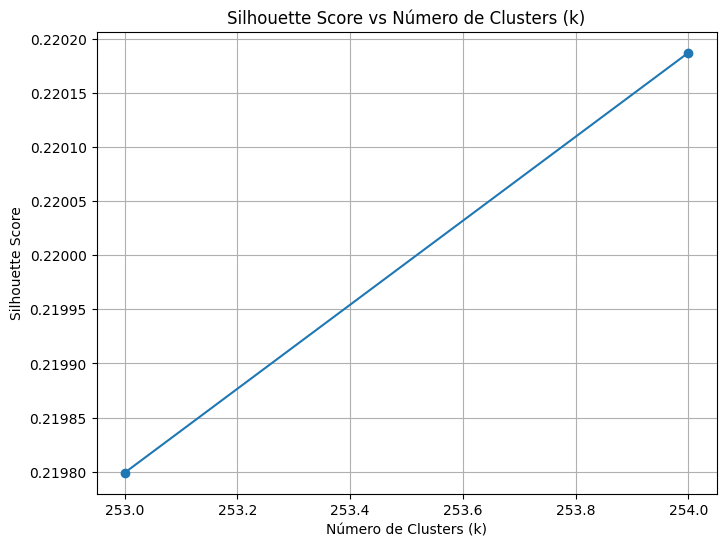

El número óptimo de clusters es 254 con un Silhouette Score de 0.2201869741272957


In [400]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Los datos de prueba (X_test) se escalan usando el StandardScaler para estandarizarlos,
# lo que asegura que todas las características tengan una media de 0 y desviación estándar de 1.


scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_test)

# Se define un rango de valores para k (número de clusters) que será probado en el modelo K-Means.
rango_k = range(253, 255)

# Lista para almacenar los silhouette scores
silhouette_scores = []

# Aplicar k-means y calcular el Silhouette Score para cada valor de k
for k in rango_k:
    # Para cada valor, se aplica el algoritmo K-Means con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Se generan las etiquetas de cluster para los datos escalados.
    etiquetas = kmeans.fit_predict(data_scaled)

    # Calcular el silhouette score
    score = silhouette_score(data_scaled, etiquetas)
    silhouette_scores.append(score)
    print(f'Para k={k}, Silhouette Score: {score}')

# Crear una gráfica de Silhouette Score vs número de clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(list(rango_k), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Encontrar el k con el Silhouette Score más alto
k_optimo = rango_k[np.argmax(silhouette_scores)]
print(f'El número óptimo de clusters es {k_optimo} con un Silhouette Score de {max(silhouette_scores)}')


In [401]:
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score

from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 50 componentes principales
pca = PCA(n_components=50, random_state=42)
X_test_pca = pca.fit_transform(X_test)

# Aplicar K-means en los datos reducidos
kmeans = KMeans(n_clusters=255, random_state=42)
kmeans.fit(X_test_pca)

# Obtener las pseudo-etiquetas
y_pseudo_etiquetas = kmeans.labels_

# Calcular el ARI nuevamente
ari = adjusted_rand_score(y_test_real, y_pseudo_etiquetas)
print(f"Adjusted Rand Index (ARI) después de PCA: {ari:.4f}")



Adjusted Rand Index (ARI) después de PCA: 0.1364


Implementa el algoritmo de K-Means con el número óptimo de clusters (k_optimo) que fue determinado previamente. El modelo K-Means se ajusta a los datos de entrenamiento (X_train), y la salida incluye la distancia de cada punto de los datos a los centroides de los clusters formados.

In [402]:
# Se importa la clase KMeans desde la biblioteca scikit-learn
from sklearn.cluster import KMeans
k_optimo=254
k = k_optimo
# Se crea una instancia del modelo K-Means con el número de clusters (k)
# y se establece un valor de random_state para garantizar que los resultados sean reproducibles.
kmeans = KMeans(n_clusters=k, random_state=42)
# El método fit_transform ajusta el modelo K-Means a los datos de entrenamiento (X_train)
# y devuelve un arreglo con las distancias de cada punto de los datos a los centroides
# de los clusters a los que pertenecen. Esta salida (X_digits_dist) contiene las distancias
X_digits_dist = kmeans.fit_transform(X_train)
#Ajusta el modelo a los datos para encontrar los centroides de los clusters
#Calcula las distancias de cada punto de datos a los centroides de los clusters a los que pertenecen.

#que contiene estas distancias. Cada fila en X_digits_dist corresponde a un punto de datos, 
# y cada columna corresponde a la distancia a un centroid específico.
print(X_digits_dist)

[[ 8.52597952  8.71378667  7.44350484 ...  7.53927254 10.17097357
   6.63887866]
 [ 8.90719274  8.54164227  7.42030662 ...  8.6219055   9.99509418
   6.64272587]
 [ 8.51476707  5.01988502  9.79853843 ... 11.80187158  4.80689033
   7.07347274]
 ...
 [ 9.46827716  6.7583258   9.58014123 ... 11.41611813  8.37088885
   7.00835534]
 [ 7.75623708  4.7461456   9.86173021 ... 11.10118988  6.10590784
   7.90824393]
 [ 9.39442967  8.61018927  5.74948363 ... 10.02302354  9.80720443
   7.93757941]]


Este código selecciona los puntos representativos de cada cluster resultante del algoritmo K-Means, utilizando las distancias mínimas de cada punto hacia los centroides de los clusters. Estos puntos representativos serán los más cercanos a los centroides de sus respectivos clusters.

In [403]:
# Identifica el punto que está más cerca del centro de cada cluster. y guarda sus indices
idxs = np.argmin(X_digits_dist, axis=0)
# Usando los índices encontrados en idxs, se seleccionan los puntos correspondientes en los datos de entrenamiento (X_train)
X_representative_digits = X_train[idxs]

Este código visualiza los puntos representativos de cada cluster en un conjunto de imágenes, mostrando los ejemplos más cercanos a los centroides

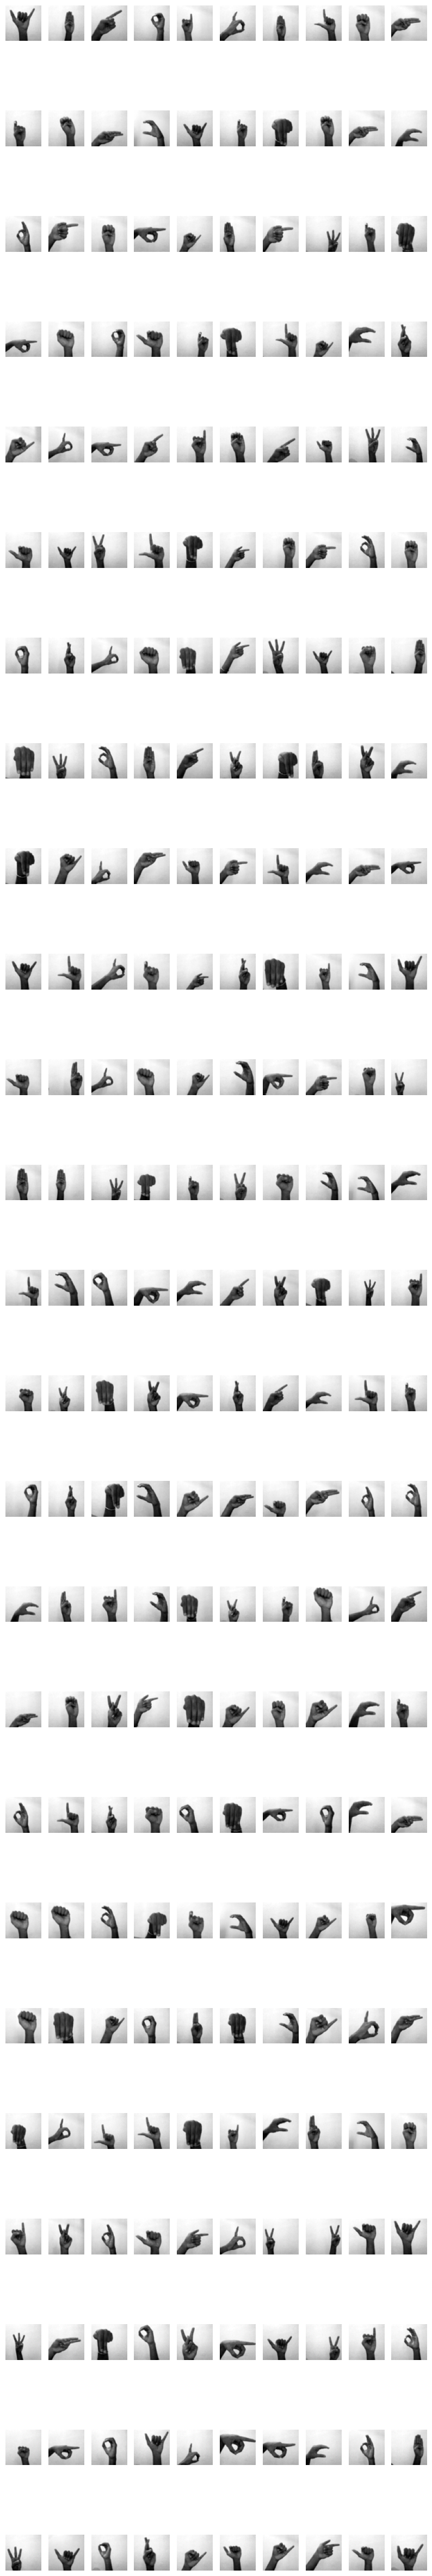

In [404]:
import matplotlib.pyplot as plt

# Limitar a las primeras 250 imágenes
num_images = min(len(X_representative_digits), 250)

# Calcular el número de filas necesario
rows = (num_images // 10) + 1  # Calcula el número de filas basado en el número de imágenes

# Se crea una nueva figura para la visualización con un tamaño ajustado
plt.figure(figsize=(10, rows * 2.5))  # Aumentar el tamaño de la figura proporcionalmente a las filas

# Se itera sobre el conjunto de datos X_representative_digits
for index in range(num_images):
    # Se crea una cuadrícula de filas y 10 columnas para acomodar las imágenes
    plt.subplot(rows, 10, index + 1)
    # Se visualiza la imagen representativa usando plt.imshow()
    plt.imshow(X_representative_digits[index].reshape(50, 50), cmap="binary")
    # Se elimina el eje alrededor de cada imagen para que la cuadrícula esté limpia
    plt.axis('off')

# Finalmente, se muestra la visualización completa
plt.show()


Anotación de las etiquetas (Gracias a tener un data set con etiquetas directamente las asignamos)

In [405]:
y_representative_digits = y_train[idxs]
# selecciona las etiquetas correspondientes a esos puntos representativos del conjunto de etiquetas de entrenamiento y_train

Entrenamiento basado en las imagenes representativas

In [406]:
# Se importa la clase LogisticRegression del módulo sklearn.linear_model. Esta clase se utiliza para implementar un modelo de regresión logística
from sklearn.linear_model import LogisticRegression
# Se crea una instancia del modelo de regresión logística llamado log_reg2 con los siguientes parámetros:
# multi_class="ovr": Especifica que se utilizará el enfoque "one-vs-rest" (OvR) para manejar problemas multiclase, donde se entrena un clasificador binario para cada clase.
# solver="lbfgs": Indica el algoritmo de optimización a utilizar; lbfgs es un método eficiente para la optimización en problemas de regresión logística.
# max_iter=5000: Establece el número máximo de iteraciones para el algoritmo de optimización, permitiendo que el modelo tenga más tiempo para converger.
# random_state=42: Fija la semilla del generador de números aleatorios para garantizar la reproducibilidad de los resultados.
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
# Se entrena el modelo log_reg2 utilizando el método fit(), pasando las imágenes representativas
# Imprimir el tamaño de los datos representativos y sus etiquetas
print(f"Tamaño de X_representative_digits: {X_representative_digits.shape}")
print(f"Tamaño de y_representative_digits: {y_representative_digits.shape}")

# Imprimir los datos y etiquetas representativos (opcionalmente, una muestra)
print("X_representative_digits (muestra):")
print(X_representative_digits[:5])  # Mostrar las primeras 5 filas

print("y_representative_digits (muestra):")
print(y_representative_digits[:5])  # Mostrar las primeras 5 etiquetas

# (X_representative_digits) y sus etiquetas correspondientes (y_representative_digits)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
# Se evalúa el rendimiento del modelo entrenado utilizando el método score(),
# que calcula la precisión del modelo en el conjunto de prueba (X_test, y_test).
# Devuelve un valor entre 0 y 1 que representa la proporción de predicciones correctas realizadas por el modelo sobre el conjunto de prueba.
log_reg2.score(X_test, y_test)

Tamaño de X_representative_digits: (254, 2500)
Tamaño de y_representative_digits: (254,)
X_representative_digits (muestra):
[[-0.65098039 -0.64705882 -0.64705882 ... -0.4745098  -0.48627451
  -0.47058824]
 [-0.67843137 -0.6745098  -0.67058824 ... -0.50196078 -0.49803922
  -0.49803922]
 [-0.68627451 -0.69019608 -0.69411765 ... -0.47843137 -0.4745098
  -0.47058824]
 [-0.67058824 -0.67058824 -0.6745098  ... -0.50196078 -0.49803922
  -0.49411765]
 [-0.68235294 -0.68235294 -0.68627451 ... -0.53333333 -0.53333333
  -0.5254902 ]]
y_representative_digits (muestra):
[24  1 25 14  8]


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 1.98 s
Wall time: 2.08 s


0.669

Se hace el mismo entrenamiento con valores aleatorios para verificar que los valores representativos son más eficientes

In [407]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:255], y_train[:255])
log_reg.score(X_test, y_test)

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 766 ms
Wall time: 1.12 s


0.5438333333333333

In [408]:
# Se crea un array vacío llamado y_train_propagated con la misma longitud que X_train
y_train_propagated = np.empty(len(X_train))
# : Este bucle itera sobre cada cluster (del 0 al k-1 donde k es el nro optimo
for i in range(k):
  # Asigna la etiqueta correspondiente de las imágenes representativas (y_representative_digits[i]) a todas las imágenes en X_train que están en el cluster
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
print(y_train_propagated)

[20.  8.  8. ...  2.  4.  7.]


In [409]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
#Aquí se entrena el modelo log_reg3 utilizando el método fit(), pero solo con las primeras 1000 muestras del conjunto de entrenamiento 
# (X_train[:1000]) y sus correspondientes etiquetas propagadas (y_train_propagated[:1000]).
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
# : Se evalúa el rendimiento del modelo entrenado (log_reg3) usando el método score(),
# que calcula la precisión del modelo en el conjunto de prueba (X_test, y_test).
log_reg3.score(X_test, y_test)

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 2.28 s
Wall time: 2.52 s


0.648

#Aprendizaje Activo
El aprendizaje activo es una técnica dentro del aprendizaje automático donde el modelo tiene la capacidad de seleccionar las muestras de entrenamiento más informativas. A diferencia de los enfoques tradicionales que utilizan un conjunto de datos estático, en el aprendizaje activo el modelo puede identificar qué ejemplos son más útiles para mejorar su rendimiento

El método predict_proba() devuelve un array probas, donde cada fila corresponde a una muestra y cada columna corresponde a la probabilidad de pertenencia a cada clase. Por ejemplo, probas[i][j] representa la probabilidad de que la i-ésima imagen pertenezca a la j-ésima clase.

In [410]:
# Se utiliza el modelo log_reg3 para predecir las probabilidades de pertenencia a cada clase para las primeras 1000 imágenes de X_train
probas = log_reg3.predict_proba(X_train[:1000])
#  Se obtiene el índice de la clase con la probabilidad más alta para cada muestra en probas. np.argmax(probas, axis=1)
# devuelve un array con los índices de las clases predichas para cada una de las 1000 imágenes
labels_ixs = np.argmax(probas, axis=1)
# Se crea un array labels que contiene las probabilidades predichas para las clases asignadas a cada muestra. Utilizando una comprensión de listas
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
#  Se ordenan los índices de labels en orden ascendente, produciendo un array sorted_ixs que contiene los índices de las probabilidades
sorted_ixs = np.argsort(labels)
# Finalmente, se seleccionan las 10 probabilidades más bajas utilizando sorted_ixs[:10],
# lo que permite identificar las 10 muestras que el modelo considera menos seguras
labels[sorted_ixs[:10]]

array([0.19509915, 0.22112246, 0.24109308, 0.26343412, 0.26755385,
       0.28929271, 0.29708556, 0.30810414, 0.31355406, 0.32307554])

Visualización de las Muestras con Menor Confianza en las Predicciones: Este bloque de código se encarga de seleccionar y visualizar las imágenes que el modelo clasificador ha etiquetado con la menor probabilidad de confianza.

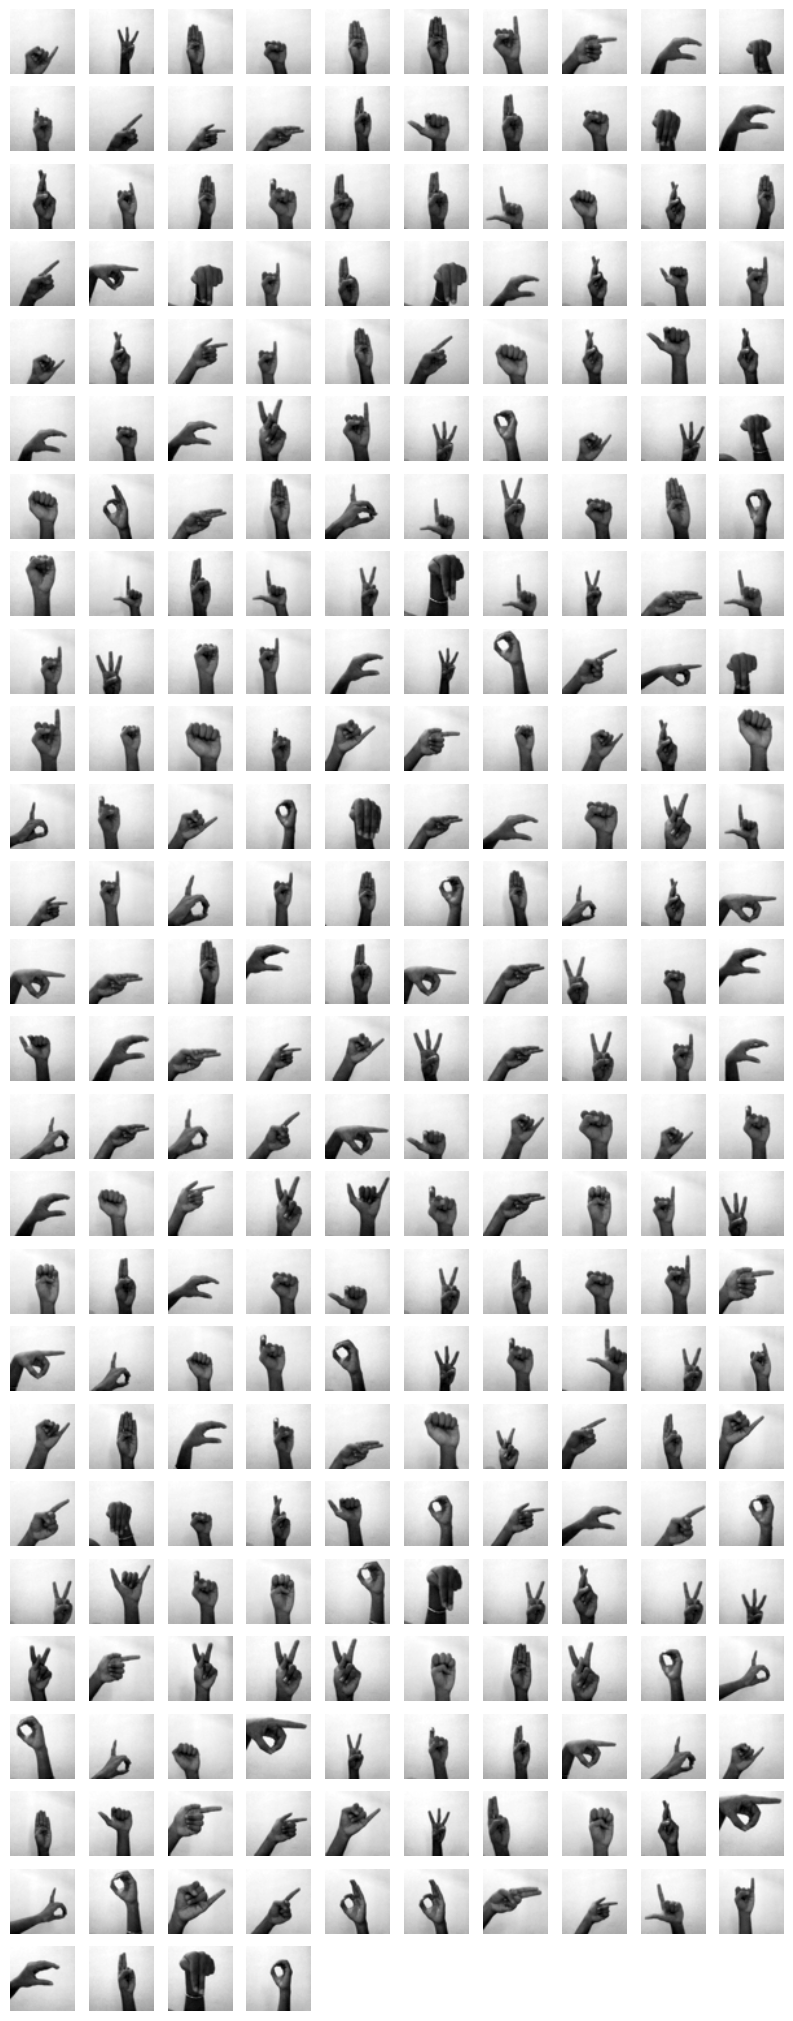

In [411]:
# Aquí se seleccionan las imágenes del conjunto de entrenamiento (X_train[:1000]) que corresponden a las probabilidades más bajas calculadas previamente
X_lowest = X_train[:1000][sorted_ixs[:k]]
# Se crea una nueva figura para la visualización con un tamaño específico de 10 unidades de ancho y 25 unidades de alto
plt.figure(figsize=(10, 26))
# ste bucle itera sobre las imágenes en X_lowest. Para cada imagen (img), se crea un subplot en la figura que se ha preparado.
for index, img in enumerate(X_lowest):
    plt.subplot(26, 10, index + 1)
    plt.imshow(img.reshape(50, 50), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

Este fragmento de código se utiliza para extraer las etiquetas correspondientes a las muestras del conjunto de entrenamiento

In [412]:
# En esta línea, se seleccionan las etiquetas (y_train) correspondientes a las muestras que han sido identificadas como las menos confiables en la clasificación.
y_lowest = y_train[:1000][sorted_ixs[:k]]
# y_lowest contendrá las etiquetas de las imágenes en X_lowest, que son las que el modelo clasificó con menor confianza
y_lowest

array([ 9, 22,  1, 18,  1,  1,  8,  6, 16, 13, 23, 25,  6,  7, 20, 19, 20,
       18, 12, 16, 17,  8,  1, 23, 20, 20, 11,  0, 17,  1, 25, 15, 13,  8,
       20, 13, 16, 17, 19,  8,  9, 17,  6,  8,  1, 25,  0, 17, 19, 17, 16,
       18, 16, 10,  8, 22, 14,  9, 22, 13,  0,  5,  7,  1,  3, 11, 21, 18,
        1, 14, 18, 11, 20, 11, 21, 13, 11, 21,  7, 11,  8, 22, 18,  8, 16,
       22, 14, 25, 15, 13,  8, 18,  0, 23,  9,  6, 18,  9, 17,  0,  3, 23,
        9, 14, 12,  7, 16, 18, 10, 11,  6,  8,  3,  8,  1, 14,  1,  3, 17,
       15, 15,  7,  1, 16, 20, 15,  7, 21, 18, 16, 19, 16,  7,  6,  9, 22,
        7, 21,  8, 16,  3,  7,  3, 25, 15, 19,  9, 18,  9, 23, 16,  0,  6,
       10, 24, 23,  7,  4,  8, 22,  4, 20, 16, 18, 19, 21, 20, 18,  8,  6,
       15,  3,  0, 23, 14, 22, 23, 11, 21,  8,  9,  1, 16, 23,  7,  0, 10,
       25, 20,  9, 25, 12, 18, 17, 19, 14,  6, 16, 25, 14, 21, 24, 23,  4,
       14, 13, 21, 17, 21, 22, 10,  6, 10, 10, 10,  4,  1, 10, 14,  3, 14,
        3,  0, 15, 21, 23

El objetivo de este código es mejorar la calidad de las etiquetas en el conjunto de entrenamiento, asegurando que las muestras con menor confianza estén correctamente etiquetadas

In [413]:
# crea una copia de las primeras 1000 etiquetas del conjunto de entrenamiento propagado
y_train2 = y_train_propagated[:1000].copy()
# se reemplazan las etiquetas en y_train2 que corresponden a las k
# muestras con menor confianza (identificadas por los índices en sorted_ixs) con las etiquetas almacenadas en y_lowest
y_train2[sorted_ixs[:k]] = y_lowest

Se centra en el reentrenamiento de un modelo de regresión logística utilizando un conjunto de datos de entrenamiento con etiquetas actualizadas

Entrena un modelo de regresión logística utilizando un subconjunto del conjunto de entrenamiento (X_train[:1000]) y un conjunto de etiquetas mejorado (y_train2)

El objetivo es evaluar la efectividad del modelo al adaptarse a las etiquetas más precisas y representativas obtenidas a través de un proceso de aprendizaje activo.

In [414]:
#Aquí se crea una instancia del modelo de regresión logística.
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
# Se evalúa la precisión del modelo entrenado utilizando el conjunto de prueba (X_test) y sus respectivas etiquetas (y_test)
log_reg5.score(X_test, y_test)

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 2.92 s
Wall time: 2.99 s


0.6863333333333334